<a href="https://colab.research.google.com/github/ibacaraujo/to-tensorflow2/blob/master/classify_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify images!

In [1]:
!pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 63.7MB/s 
     |████████████████████████████████| 3.1MB 34.4MB/s 
     |████████████████████████████████| 501kB 45.9MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


## Load Fashion MNIST

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [7]:
type(train_images)

numpy.ndarray

In [8]:
type(train_labels)

numpy.ndarray

In [5]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels), train_labels.shape

(60000, (60000,))

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
len(test_labels)

10000

## Preprocess the data

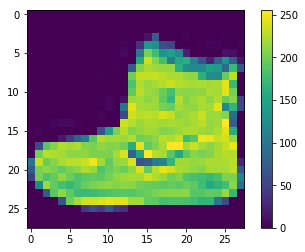

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

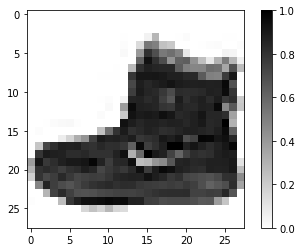

In [17]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

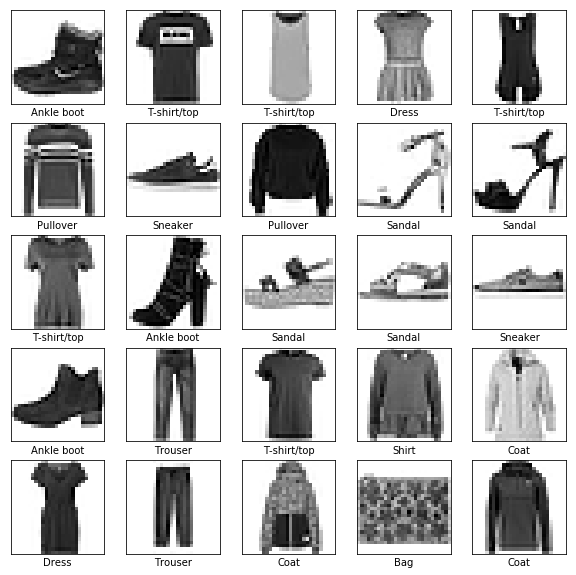

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [21]:
model.fit(train_images, train_labels, epochs=10)

W0802 12:35:07.864179 140476906358656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4919 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3713 - accuracy: 0.8663
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3335 - accuracy: 0.8783
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3105 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2911 - accuracy: 0.8933
Epoch 6/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2788 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2661 - accuracy: 0.9013
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2543 - accuracy: 0.9061
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2452 - accuracy: 0.9075
Epoch 10/10
60

## Evaluate the model

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.3378 - accuracy: 0.8846

Test accuracy: 0.8846


## Make predictions

In [0]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([7.6027538e-07, 1.1273439e-10, 1.2880715e-10, 3.6768893e-11,
       2.6144789e-09, 3.7862468e-03, 3.3302985e-08, 2.1863043e-02,
       7.1265112e-07, 9.7434920e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [27]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

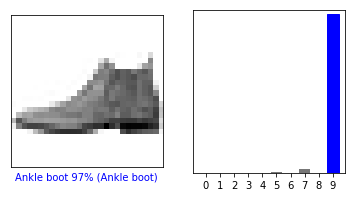

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

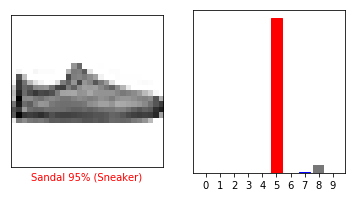

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

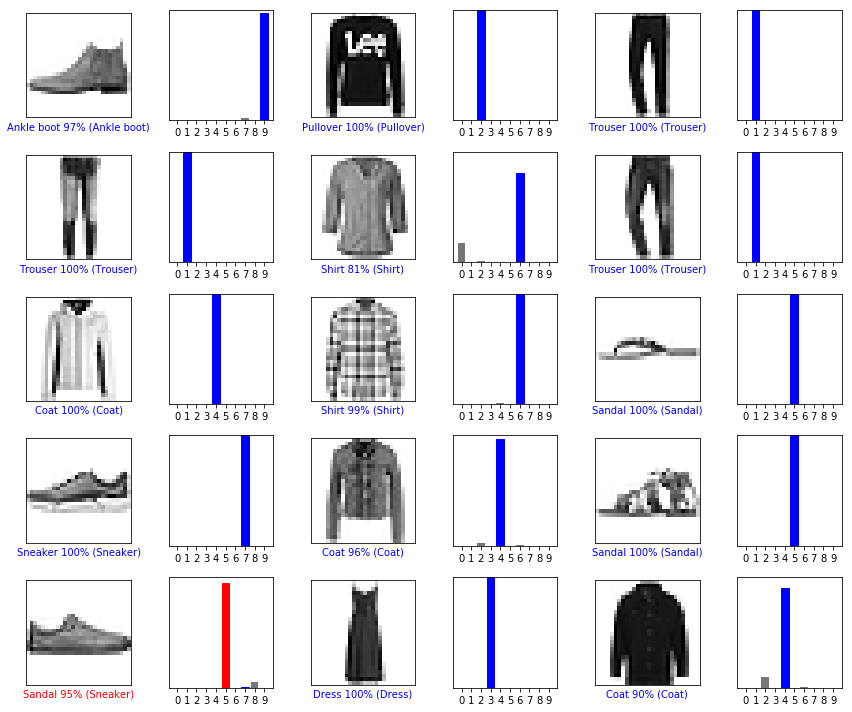

In [36]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.tight_layout()
plt.show()

In [40]:
img = test_images[0]

print(img.shape)

(28, 28)


In [41]:
# Add image to a batch where it is the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = model.predict(img)

print(class_names[np.argmax(predictions_single)])

Ankle boot


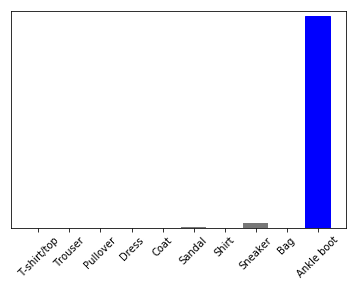

In [43]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

Great! Let's explore!

I had the idea of using a convolutional model and test it on this dataset.

In [0]:
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', input_shape=[28,28,1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (1, 1), padding='same'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
train_images = train_images.reshape([-1,28,28,1])
test_images = test_images.reshape([-1,28,28,1])

In [59]:
model2.fit(train_images, train_labels, batch_size=64, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.6508 - accuracy: 0.7668
Epoch 2/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.3980 - accuracy: 0.8657
Epoch 3/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.3422 - accuracy: 0.8840
Epoch 4/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.3111 - accuracy: 0.8941
Epoch 5/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.2924 - accuracy: 0.9007
Epoch 6/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.2770 - accuracy: 0.9049
Epoch 7/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.2601 - accuracy: 0.9104
Epoch 8/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.2457 - accuracy: 0.9149
Epoch 9/30
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.2413 - accuracy: 0.9169
Epoch 10/30
60

In [0]:
test_images = test_images.reshape([-1, 28, 28, 1])

In [61]:
model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 536us/sample - loss: 0.3365 - accuracy: 0.9183


[0.3364679367057979, 0.9183]

Great!